In [1]:
%load_ext autoreload
%autoreload 2

# Loading Data

In [2]:
from dataloading import *

In [3]:
# +---------------------+----------------+
# |       Property      | Importance (%) |
# +---------------------+----------------+
# |......................................|
# |        CLDAP        |      <1 %      |
# |      is_weekday     |      <1 %      |
# |         DNS         |      <1 %      |
# |      SYN Attack     |      <1 %      |
# |     Generic UDP     |      <1 %      |
# |         NTP         |      <1 %      |
# |  IPv4 fragmentation |      <1 %      |
# |         CoAP        |      <1 %      |
# |         SNMP        |      <1 %      |
# |         SSDP        |      <1 %      |
# |     TCP Anomaly     |      <1 %      |
# |       CHARGEN       |      <1 %      |
# |  other_attack_codes |      <1 %      |
# |         RDP         |      0 %       |
# +---------------------+----------------+

irrelevants = [
    'CLDAP',
    'is_weekday',
    'DNS',
    'SYN Attack',
    'Generic UDP',
    'NTP',
    'IPv4 fragmentation',
    'CoAP',
    'SNMP',
    'SSDP',
    'TCP Anomaly',
    'CHARGEN',
    'other_attack_codes',
    'RDP'
]
irrelevants = []

In [4]:
PATH_DATA_TRAIN         = '../data/preprocessed-v2/train_vectors_scaled.csv'
PATH_DATA_VALIDATION    = '../data/preprocessed-v2/validation_vectors_scaled.csv'
PATH_DATA_TEST          = '../data/preprocessed-v2/test_vectors_scaled.csv'
PATH_DATA_GEN          = '../data/preprocessed-v2/generalisation_vectors_scaled.csv'
TEST_SIZE = .2
UNIQUE_COLUMNS = False

(training_data_df, training_target_df) = get_all_data(
    path_all_vectors=PATH_DATA_TRAIN, unique=UNIQUE_COLUMNS, remove_columns=['is_synthetic'] + irrelevants)

(validation_data_df, validation_target_df) = get_all_data(
    path_all_vectors=PATH_DATA_VALIDATION, unique=UNIQUE_COLUMNS, remove_columns=irrelevants)

(test_data_df, test_target_df) = get_all_data(
    path_all_vectors=PATH_DATA_TEST, unique=UNIQUE_COLUMNS, remove_columns=irrelevants)

(gen_data_df, gen_target_df) = get_all_data(
    path_all_vectors=PATH_DATA_GEN, unique=UNIQUE_COLUMNS, remove_columns=irrelevants)

In [5]:
# Assert inputs are of same length
assert training_data_df.columns.to_list() == validation_data_df.columns.to_list() == test_data_df.columns.to_list() == gen_data_df.columns.to_list()
assert training_target_df.columns.to_list() == validation_target_df.columns.to_list() == test_target_df.columns.to_list() == gen_target_df.columns.to_list()

In [6]:
print((training_data_df.columns.to_list()))
print((validation_data_df.columns.to_list()))
print((test_data_df.columns.to_list()))
print((gen_data_df.columns.to_list()))

['Avg packet len', 'CHARGEN', 'CLDAP', 'CoAP', 'DNS', 'Data speed', 'Generic UDP', 'High volume traffic', 'IPv4 fragmentation', 'NTP', 'Packet speed', 'Port number', 'RDP', 'SNMP', 'SSDP', 'SYN Attack', 'Significant flag', 'Source IP count', 'Suspicious traffic', 'TCP Anomaly', 'is_weekday', 'other_attack_codes', 'time_of_day', 'victim IP num']
['Avg packet len', 'CHARGEN', 'CLDAP', 'CoAP', 'DNS', 'Data speed', 'Generic UDP', 'High volume traffic', 'IPv4 fragmentation', 'NTP', 'Packet speed', 'Port number', 'RDP', 'SNMP', 'SSDP', 'SYN Attack', 'Significant flag', 'Source IP count', 'Suspicious traffic', 'TCP Anomaly', 'is_weekday', 'other_attack_codes', 'time_of_day', 'victim IP num']
['Avg packet len', 'CHARGEN', 'CLDAP', 'CoAP', 'DNS', 'Data speed', 'Generic UDP', 'High volume traffic', 'IPv4 fragmentation', 'NTP', 'Packet speed', 'Port number', 'RDP', 'SNMP', 'SSDP', 'SYN Attack', 'Significant flag', 'Source IP count', 'Suspicious traffic', 'TCP Anomaly', 'is_weekday', 'other_attack

In [7]:
X_train = training_data_df.to_numpy()
X_validation = validation_data_df.to_numpy()
X_test = test_data_df.to_numpy()
X_gen = gen_data_df.to_numpy()

y_train = training_target_df.to_numpy().squeeze(1)
y_validation = validation_target_df.to_numpy().squeeze(1)
y_test = test_target_df.to_numpy().squeeze(1)
y_gen = gen_target_df.to_numpy().squeeze(1)

In [8]:
cnt = lambda df, t : len(df['Type'].values[df['Type'].values == t])

for i in range(3):
    print(cnt(training_target_df, i))
print()
for i in range(3):
    print(cnt(validation_target_df, i))
print()
for i in range(3):
    print(cnt(test_target_df, i))
print()
for i in range(3):
    print(cnt(gen_target_df, i))
print()

448943
448943
448943

305167
919196
22903

201443
1024688
7318

642312
1421461
388837



In [9]:
classes = 3
if classes == 2:
    y_train[y_train == 2] = 1
    y_validation[y_validation == 2] = 1
    y_test[y_test == 2] = 1
    y_gen[y_gen == 2] = 1

In [10]:
print('X_train.shape: ', X_train.shape)
print('X_validation.shape: ', X_validation.shape)
print('X_test.shape: ', X_test.shape)
print('X_gen.shape: ', X_gen.shape)

X_train.shape:  (1346829, 24)
X_validation.shape:  (1247266, 24)
X_test.shape:  (1233449, 24)
X_gen.shape:  (2452610, 24)


In [11]:
print('y_train.shape: ', y_train.shape)
print('y_validation.shape: ', y_validation.shape)
print('y_test.shape: ', y_test.shape)
print('y_gen.shape: ', y_gen.shape)

y_train.shape:  (1346829,)
y_validation.shape:  (1247266,)
y_test.shape:  (1233449,)
y_gen.shape:  (2452610,)


***

# Model

In [12]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# MODEL INIT
model = RandomForestClassifier(
    n_estimators=10,
    max_depth=3,
    bootstrap=True,
    oob_score=False,
    verbose=True,
    )

# model = GradientBoostingClassifier(
#     n_estimators=100,
#     learning_rate=1.0,
#     max_depth=1,
#     random_state=0)

In [13]:
# TRAINING

_ = model.fit(X_train, y_train)

In [14]:
# from collections import defaultdict

# count = defaultdict(int)
# for tree in model.estimators_:
#     print(tree.get_depth(), end=', ')
#     count[tree.get_depth()] += 1
# count = dict(count)
# for item, key in count.items():
#     print(f'{key} trees have length {item}')

In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def test(dataset:np.ndarray, target:np.ndarray):
    # get predictions
    y_pred = model.predict(dataset)

    matches = np.count_nonzero(target == y_pred)
    print(f'Accuracy: {100 * matches / len(target)} %')
    return confusion_matrix(target, y_pred)


cm_train = test(X_train, y_train)
cm_validation = test(X_validation, y_validation)
cm_test = test(X_test, y_test)
cm_gen = test(X_gen, y_gen)

Accuracy: 92.89226768951366 %
Accuracy: 63.82223198579934 %
Accuracy: 75.57847953178445 %
Accuracy: 96.1017854448934 %


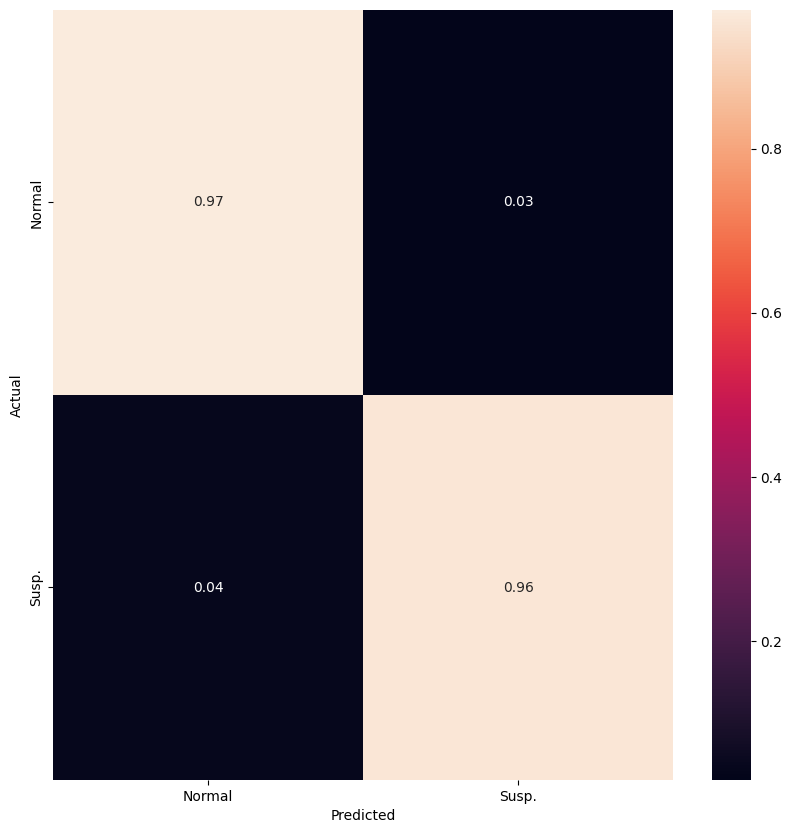

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_gen, model.predict(X_gen))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=['Normal', 'Susp.', 'DDOS'][:classes], yticklabels=['Normal', 'Susp.', 'DDOS'][:classes])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [17]:
import joblib
joblib.dump(model, f"{classes}classes_random_forest_95%gen.joblib")
# model = joblib.load("random_forest.joblib")

['2classes_random_forest_95%gen.joblib']

In [18]:
from prettytable import PrettyTable

info_data = list(training_data_df.columns.values)

table = PrettyTable()
table.field_names = ["Property", "Importance (%)"]

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

for i in indices:
    imp = 100 * importances[i]

    if imp > 0:
        if int(imp) == 0:
            imp = '<1 %'
        else:
            imp = f'{int(imp)} %'
    else:
        imp = '0 %'


    table.add_row([info_data[i], imp])

print(table)

+---------------------+----------------+
|       Property      | Importance (%) |
+---------------------+----------------+
|      Data speed     |      23 %      |
|    victim IP num    |      17 %      |
|    Avg packet len   |      14 %      |
|   Source IP count   |      13 %      |
|     Port number     |      11 %      |
|   Significant flag  |      4 %       |
| High volume traffic |      4 %       |
|        CLDAP        |      3 %       |
|     Generic UDP     |      2 %       |
|     Packet speed    |      2 %       |
|         DNS         |      1 %       |
|     time_of_day     |      <1 %      |
|  IPv4 fragmentation |      <1 %      |
|      is_weekday     |      <1 %      |
|      SYN Attack     |      <1 %      |
|         SNMP        |      0 %       |
|         RDP         |      0 %       |
|     TCP Anomaly     |      0 %       |
|         NTP         |      0 %       |
|         SSDP        |      0 %       |
|  other_attack_codes |      0 %       |
|         CoAP  

In [19]:
# 2 classes                                     3 classes #
# +----------------+---------------------+----------------+
# | Importance (%) |       Property      | Importance (%) |
# +----------------+---------------------+----------------+
# |      29 %      |    victim IP num    |      35 %      |
# |      16 %      | High volume traffic |      16 %      |
# |      14 %      |      Data speed     |      16 %      |
# |      14 %      |   Source IP count   |      10 %      |
# |      7 %       |    Avg packet len   |      8 %       |
# |      7 %       |   Significant flag  |      4 %       |
# |      5 %       |  Suspicious traffic |      2 %       |
# |      1 %       |     Packet speed    |      1 %       |
# |      <1 %      |     Port number     |      <1 %      |
# |      <1 %      |     time_of_day     |      <1 %      |
# |      <1 %      |         DNS         |      <1 %      |
# |      <1 %      |     Generic UDP     |      <1 %      |
# |      <1 %      |        CLDAP        |      <1 %      |
# |      <1 %      |      SYN Attack     |      <1 %      |
# |      <1 %      |      is_weekday     |      <1 %      |
# |      0 %       |         CoAP        |      <1 %      |
# |      0 %       |         SSDP        |      0 %       |
# |      0 %       |         SNMP        |      0 %       |
# |      0 %       |         RDP         |      0 %       |
# |      0 %       |     TCP Anomaly     |      0 %       |
# |      0 %       |  IPv4 fragmentation |      0 %       |
# |      0 %       |  other_attack_codes |      0 %       |
# |      0 %       |       CHARGEN       |      0 %       |
# |      0 %       |         NTP         |      0 %       |
# +----------------+---------------------+----------------+

# WanDB init

In [20]:
assert False, "WanDB not yet needed."

AssertionError: WanDB not yet needed.

In [ ]:
import wandb

# start a new wandb run and add your model hyperparameters
wandb.init(project='Halado_Adatelemzes_Labor', config=model.get_params())

# Add additional configs to wandb
wandb.config.update({"test_size" : TEST_SIZE,
                    "train_len" : len(X_train),
                    "test_len" : len(X_validation)})

In [ ]:
from wandb.sklearn import plot_precision_recall, plot_feature_importances
from wandb.sklearn import plot_class_proportions, plot_learning_curve, plot_roc

y_probas = model.predict_proba(X_validation)

# log additional visualisations to wandb
plot_class_proportions(y_train, y_validation, info_data)
# plot_learning_curve(model, X_train, y_train)
plot_roc(y_validation, y_probas, info_data)
plot_precision_recall(y_validation, y_probas, info_data)
plot_feature_importances(model)

In [ ]:
# Finish the wandb run
wandb.finish()